Suppose you are working as an analyst at an e-commerce company, and you have been given the following two data sets, which consist of details of women's apparels that have been sold out during the last year:

Dress Attribute Dataset: This data set contains the different features of women's apparels.
Dress Sales Dataset: This data set contains the number of sales achieved for a particular dress ID on a certain date.

This data set contains a total of 13 features related to the dresses. These are the following: 

Dress_ID: This represents the ID number of a particular dress; it is a unique identification number for different dresses.

Style: This represents the style of a particular dress according to the occasion, for example, party, cute, vintage, etc.

Price: For a particular dress ID, there are buckets of Low, Medium and High prices.

Rating: This is the average rating given by the customer to a particular dress ID.

Size: The size column shows the majority of the size purchased by the customers in the previous sale.

Season: This depicts the season in which a particular type of dress is suitable, for example, summer, winter, etc.

Neckline: This shows the type of neckline in a dress, for example, v-neck, o-neck, etc.

SleeveLength: This represents the variety of sleeve length in the dresses, for example, half sleeves, full sleeves, cap sleeves, etc. 

Material: This represents the fabric material of the dresses, for instance, nylon, polyester, cotton, silk, etc.

FabricType: This represents the type of fabric used for making the dress, for example, chiffon, broadcloth, jersey, etc.

Decoration: This represents the kind of decoration around the dress like ruffles, bow, embroidery, etc.

Pattern Type: This represents the kind of patterns that are printed on a particular dress. Pattern may be solid colours, geometric designs, printed or patchwork.

Recommendation: This is the target variable; the recommendation is based on the features and sales of a dress in the previous year. This is either 1 (which means yes) or 0 (which means no). This shows whether a particular dress is suitable for sale to the customers or not. 

In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

E:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Cleaning 

### Data Reading & Data Types 

In [2]:
#Read the data in pandas
att= pd.read_csv("Attribute_Dataset.csv")
sales= pd.read_csv("Dress_Sales.csv ")

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


In [3]:
# Print the information about the attributes of inp0 and inp1.
att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [5]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.

att['Size'] = att['Size'].replace(['M','free','L','XL'],['Medium','Free','Large','Extra Large'])
att['Size'] = att['Size'].replace(['S','s','small'],'Small')

In [6]:
# Print the value counts of each category in "Size" column.
att['Size'].value_counts(normalize = True)

Medium         0.356994
Free           0.344468
Large          0.194154
Small          0.075157
Extra Large    0.029228
Name: Size, dtype: float64

### Impute/Remove Missing values

In [7]:
# Print the null count of each variables of inp0 and inp1.

round(100 * att.isnull().sum()/len(att),2)

Dress_ID           0.00
Style              0.00
Price              0.42
Rating             0.00
Size               0.00
Season             0.42
NeckLine           0.63
SleeveLength       0.42
Material          24.84
FabricType        53.44
Decoration        46.76
Pattern Type      21.29
Recommendation     0.00
dtype: float64

You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [8]:
# Print the data types information of inp1 i.e. "Dress Sales" data.

sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [9]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
#sales['09-12-2013'] = sales['09-12-2013'].astype('float')


In [10]:
#print(sales['18-09-2013'].astype('float'))

In [11]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
sales['09-12-2013'] = sales['09-12-2013'].replace("Removed", 0)
sales['09-12-2013'] = sales['09-12-2013'].astype('float')

In [12]:
sales['14-09-2013'] = sales['14-09-2013'].replace("removed", 0)
sales['14-09-2013'] = sales['14-09-2013'].astype('float')

In [13]:

sales['16-09-2013'] = sales['16-09-2013'].replace("removed", 0)
sales['16-09-2013'] = sales['16-09-2013'].astype('float')

In [14]:
sales['18-09-2013'] = sales['18-09-2013'].replace("removed", 0)
sales['18-09-2013'] = sales['18-09-2013'].astype('float')

In [15]:
sales['20-09-2013'] = sales['20-09-2013'].replace("removed",0)
sales['20-09-2013'] = sales['20-09-2013'].astype('float')

In [16]:
sales['22-09-2013'] = sales['22-09-2013'].replace("Orders",0)
sales['22-09-2013'] = sales['22-09-2013'].astype('float')

In [17]:
# Convert the object type columns in "Dress Sales" into float type of data type.
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    float64
 9   14-09-2013  479 non-null    float64
 10  16-09-2013  479 non-null    float64
 11  18-09-2013  479 non-null    float64
 12  20-09-2013  479 non-null    float64
 13  22-09-2013  479 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

In [18]:
# Print the null percetange of each column of inp1.

round(100*sales.isnull().sum()/len(sales),2)

Dress_ID       0.00
29-08-2013     0.00
31-08-2013     0.00
09-02-2013     0.00
09-04-2013     0.00
09-06-2013     0.00
09-08-2013     0.00
09-10-2013     0.00
09-12-2013     0.00
14-09-2013     0.00
16-09-2013     0.00
18-09-2013     0.00
20-09-2013     0.00
22-09-2013     0.00
24-09-2013     0.00
26-09-2013    46.35
28-09-2013     0.00
30-09-2013    53.65
10-02-2013    54.07
10-04-2013    53.86
10-06-2013     0.00
10-08-2013    53.24
10-10-2013    53.24
10-12-2013     0.00
dtype: float64

In [19]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.

sales.drop(['26-09-2013','30-09-2013','10-02-2013','10-04-2013','10-08-2013','10-10-2013'], axis = 1, inplace= True)

round(100*sales.isnull().sum()/len(sales),2)

Dress_ID      0.0
29-08-2013    0.0
31-08-2013    0.0
09-02-2013    0.0
09-04-2013    0.0
09-06-2013    0.0
09-08-2013    0.0
09-10-2013    0.0
09-12-2013    0.0
14-09-2013    0.0
16-09-2013    0.0
18-09-2013    0.0
20-09-2013    0.0
22-09-2013    0.0
24-09-2013    0.0
28-09-2013    0.0
10-06-2013    0.0
10-12-2013    0.0
dtype: float64

You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [20]:
# Create the four seasons columns in inp1, according to the above criteria.

sales['Summer'] = sales.apply(lambda x: x['29-08-2013'] + x['31-08-2013'] + x['09-06-2013'] + x['09-08-2013'] + x['10-06-2013'], axis = 1)
sales['Autumn'] = sales.apply(lambda x: x['14-09-2013'] + x['16-09-2013'] + x['18-09-2013'] + x['20-09-2013'] + x['22-09-2013'] + x['24-09-2013'] + x['28-09-2013'] + x['09-10-2013'], axis = 1)
sales['Spring'] = sales.apply(lambda x: x['09-04-2013'], axis=1)
sales['Winter'] = sales.apply(lambda x: x['09-02-2013'] + x['09-12-2013']+ x['10-12-2013'], axis=1)

In [21]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
sales

,Dress_ID,29-08-2013,31-08-2013,09-02-2013,09-04-2013,09-06-2013,09-08-2013,09-10-2013,09-12-2013,14-09-2013,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Spring,Winter
0,1.006033e+09,2114,2274,2491,2660,2727,2887,2930,3119.0,3204.0,...,3386.0,3479.0,3554,3706,3897,4048,13899.0,26857.0,2660.0,9658.0
1,1.212192e+09,151,275,570,750,813,1066,1164,1558.0,1756.0,...,2106.0,2454.0,2710,3258,3911,4277,6216.0,17311.0,750.0,6405.0
2,1.190381e+09,6,7,7,7,8,8,9,10.0,10.0,...,10.0,11.0,11,11,11,11,40.0,82.0,7.0,28.0
3,9.660060e+08,1005,1128,1326,1455,1507,1621,1637,1723.0,1746.0,...,1812.0,1845.0,1878,1914,1952,1963,7213.0,14411.0,1455.0,5012.0
4,8.763395e+08,996,1175,1304,1396,1432,1559,1570,1638.0,1655.0,...,1824.0,1919.0,2032,2252,2544,2736,7706.0,14676.0,1396.0,5678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,9.905592e+08,0,0,0,60,62,64,65,67.0,68.0,...,72.0,73.0,73,75,77,77,203.0,565.0,60.0,144.0
475,7.133920e+08,0,0,0,560,554,544,537,525.0,519.0,...,492.0,480.0,400,360,380,285,1478.0,3800.0,560.0,810.0
476,5.328743e+08,0,0,0,734,728,726,715,694.0,690.0,...,665.0,658.0,616,586,551,520,2005.0,5290.0,734.0,1214.0
477,6.554649e+08,0,0,0,254,259,261,263,268.0,270.0,...,264.0,264.0,257,255,249,248,769.0,2117.0,254.0,516.0


In [22]:
att.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0


Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [23]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
att = pd.merge(left= att,right= sales, how='left', left_on='Dress_ID', right_on='Dress_ID')
att.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Spring,Winter
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899.0,26857.0,2660.0,9658.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216.0,17311.0,750.0,6405.0
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,40.0,82.0,7.0,28.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213.0,14411.0,1455.0,5012.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706.0,14676.0,1396.0,5678.0


In [24]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
att.drop(att.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)


Print the null count of inp0 to get the idea about the missing values in data set.

In [25]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.

round(100 * att.isnull().sum()/len(att),2)

Dress_ID           0.00
Style              0.00
Price              0.42
Rating             0.00
Size               0.00
Season             0.42
NeckLine           0.63
SleeveLength       0.42
Material          24.84
FabricType        53.44
Decoration        46.76
Pattern Type      21.29
Recommendation     0.00
Summer             0.00
Autumn             0.00
Spring             0.00
Winter             0.00
dtype: float64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



In [26]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength.

att = att[~att.Price.isnull()]
att = att[~att.Season.isnull()]
att = att[~att.NeckLine.isnull()]
att = att[~att.SleeveLength.isnull()]

In [27]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.

att.Material= att.Material.replace(np.nan, "Missing")

att.FabricType= att.FabricType.replace(np.nan, "Missing")

att.Decoration= att.Decoration.replace(np.nan, "Missing")

att['Pattern Type']= att['Pattern Type'].replace(np.nan, "Missing")

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [28]:
#correcting the spellings.
print(att['Season'].value_counts())
att['Season'] = att['Season'].replace(['spring','Automn','winter'],['Spring','Autumn','Winter'])

Summer    151
Spring    116
Winter     93
Automn     59
winter     44
Autumn      7
spring      2
Name: Season, dtype: int64


In [29]:
#correcting the Spellings.

att.SleeveLength= att.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")
att.SleeveLength= att.SleeveLength.replace('full', "full sleeves")
att.SleeveLength= att.SleeveLength.replace(['half','halfsleeve'], "half sleeves")
att.SleeveLength= att.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")
att.SleeveLength= att.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")
att.SleeveLength= att.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")
att.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Spring,Winter
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1,13899.0,26857.0,2660.0,9658.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0,6216.0,17311.0,750.0,6405.0
2,1190380701,vintage,High,0.0,Large,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0,40.0,82.0,7.0,28.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1,7213.0,14411.0,1455.0,5012.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706.0,14676.0,1396.0,5678.0


## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


In [30]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.

total_sale = att.groupby(['Style'])['Spring','Winter','Autumn', 'Summer'].sum()

total_sale.sum(axis = 1)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Style
Brief        139628.0
Casual      1103558.0
Flare          2089.0
Novelty       13286.0
OL              289.0
Sexy         452355.0
bohemian      69117.0
cute         361999.0
fashion         395.0
party        142041.0
sexy          93449.0
vintage      180574.0
work          93095.0
dtype: float64

In [31]:
total_sale[total_sale.sum(axis = 1) < 50000 ]

,Spring,Winter,Autumn,Summer
Style,,,,
Flare,71.0,406.0,1161.0,451.0
Novelty,563.0,2504.0,7353.0,2866.0
OL,15.0,53.0,158.0,63.0
fashion,19.0,74.0,211.0,91.0


In [32]:
att.replace(total_sale[total_sale.sum(axis = 1) < 50000].index, "Others", inplace = True)
att

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,Decoration,Pattern Type,Recommendation,Summer,Autumn,Spring,Winter
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleeve less,Missing,chiffon,ruffles,animal,1,13899.0,26857.0,2660.0,9658.0
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,Missing,ruffles,animal,0,6216.0,17311.0,750.0,6405.0
2,1190380701,vintage,High,0.0,Large,Autumn,o-neck,full sleeves,polyster,Missing,Missing,print,0,40.0,82.0,7.0,28.0
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full sleeves,silk,chiffon,embroidary,print,1,7213.0,14411.0,1455.0,5012.0
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,bow,dot,0,7706.0,14676.0,1396.0,5678.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,990559192,Brief,Average,4.7,Medium,Winter,o-neck,half sleeves,acrylic,chiffon,Missing,striped,0,203.0,565.0,60.0,144.0
475,713391965,Casual,Low,4.7,Medium,Spring,o-neck,full sleeves,polyster,Missing,Missing,solid,1,1478.0,3800.0,560.0,810.0
476,532874347,Casual,Average,4.7,Medium,Summer,v-neck,full sleeves,cotton,Missing,lace,solid,1,2005.0,5290.0,734.0,1214.0
477,655464934,Casual,Average,4.6,Large,Winter,boat-neck,sleeve less,silk,broadcloth,applique,print,1,769.0,2117.0,254.0,516.0


What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


In [33]:
# Calculate the percentage of each categories in the "Style" variable.

att['Style'].value_counts(normalize = True) * 100

Casual      45.974576
Sexy        13.771186
party       10.169492
cute         9.110169
vintage      5.296610
bohemian     4.872881
work         3.601695
Brief        3.601695
Others       2.118644
sexy         1.483051
Name: Style, dtype: float64

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [34]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
total_sale_n = att.groupby('NeckLine')['Summer','Winter','Autumn','Spring'].sum()
att.replace(total_sale_n[total_sale_n.sum(axis = 1) < 50000].index, "Others", inplace = True)
att['NeckLine'].value_counts(normalize = True) * 100

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


o-neck            54.025424
v-neck            25.000000
Others             8.898305
slash-neck         5.296610
boat-neck          3.813559
turndowncollor     2.754237
ruffled            0.211864
Name: NeckLine, dtype: float64

In [35]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.

total_sale_sl = att.groupby(['SleeveLength'])['Summer','Spring','Winter','Autumn'].sum()
att.replace(total_sale_sl[total_sale_sl.sum(axis = 1) < 50000].index,"Others", inplace = True)
att['SleeveLength'].value_counts(normalize = True) * 100

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


sleeve less     46.610169
full sleeves    19.491525
short           19.491525
half sleeves     6.991525
three quater     5.508475
Others           1.906780
Name: SleeveLength, dtype: float64

Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [36]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.

total_sale_m = att.groupby(['Material'])['Summer','Spring','Winter','Autumn'].sum()
att.replace(total_sale_m[total_sale_m.sum(axis = 1) < 25000].index,"Others", inplace = True)
att['Material'].value_counts(normalize = True) * 100

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


cotton           30.508475
Missing          24.576271
polyster         19.703390
Others            6.144068
silk              5.508475
chiffonfabric     5.084746
mix               2.542373
nylon             2.118644
rayon             2.118644
milksilk          1.059322
microfiber        0.635593
Name: Material, dtype: float64

In [37]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.

total_sale_f = att.groupby(['FabricType'])['Summer','Spring','Winter','Autumn'].sum()
att.replace(total_sale_f[total_sale_f.sum(axis = 1) < 25000].index,"Others", inplace = True)
att['FabricType'].value_counts(normalize = True) * 100

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Missing       52.966102
chiffon       27.118644
Others         7.415254
broadcloth     6.144068
worsted        3.813559
jersey         2.542373
Name: FabricType, dtype: float64

In [38]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.

total_sale_p = att.groupby(['Pattern Type'])['Summer','Spring','Winter','Autumn'].sum()
att.replace(total_sale_p[total_sale_p.sum(axis = 1) < 25000].index,"Others", inplace = True)
att['Pattern Type'].value_counts(normalize = True) * 100

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


solid        41.737288
Missing      20.762712
print        14.194915
patchwork     9.745763
animal        4.025424
striped       3.177966
dot           2.754237
Others        1.906780
geometric     1.059322
leopard       0.635593
Name: Pattern Type, dtype: float64

In [39]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.

total_sale_d = att.groupby(['Decoration'])['Summer','Spring','Winter','Autumn'].sum()
att.replace(total_sale_d[total_sale_d.sum(axis = 1) < 25000].index,"Others", inplace = True)
att['Decoration'].value_counts(normalize = True) * 100

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Missing       46.610169
Others        21.186441
sashes         8.686441
beading        4.661017
hollowout      4.449153
applique       4.237288
ruffles        3.601695
bow            2.966102
sequined       2.754237
embroidary     0.847458
Name: Decoration, dtype: float64

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



In [40]:
# Describe the numerical variale: "Autumn".

att['Autumn'].describe()

count      472.000000
mean      2862.769068
std       5036.296279
min          1.000000
25%        412.750000
50%       1335.000000
75%       3131.250000
max      55532.000000
Name: Autumn, dtype: float64

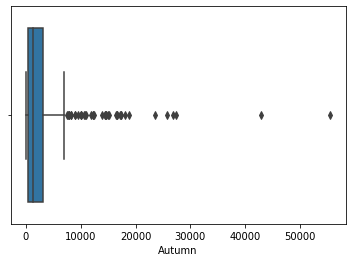

In [41]:
# plot the boxplot of "Autumn" column.

sns.boxplot(att['Autumn'])

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


In [42]:
# Find the maximum and 99th percentile of Winter season.

print(att['Winter'].max())
print(att['Winter'].quantile(0.99))


20388.0
8975.690000000019


In [43]:
# Find the maximum and 99th percentile of Summer season.

print(att['Summer'].quantile([0.99, 1]))

0.99    13971.5
1.00    35577.0
Name: Summer, dtype: float64


In [44]:
# Find the maximum and 99th percentile of Spring season.
print(att['Spring'].quantile([0.99, 1]))

0.99    2657.16
1.00    7374.00
Name: Spring, dtype: float64


In [45]:
# Find the maximum and 99th percentile of Autumn season.

print(att['Autumn'].quantile([0.99, 1]))

0.99    24112.3
1.00    55532.0
Name: Autumn, dtype: float64


## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [46]:
# Find the Mean of Ratings for each Price category.

att.groupby(['Price'])['Rating'].mean()

Price
Average      3.455042
High         2.914286
Low          3.731481
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [47]:
# Find the median of Ratings for each Style category.

att.groupby(['Style'])['Rating'].median()

Style
Brief       4.6
Casual      4.6
Others      0.0
Sexy        4.6
bohemian    4.6
cute        4.6
party       4.7
sexy        4.5
vintage     4.6
work        4.7
Name: Rating, dtype: float64

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [48]:
# Summer sale vs Recommendation.

att.groupby(['Recommendation'])['Summer'].mean()

Recommendation
0    1433.547794
1    1486.295000
Name: Summer, dtype: float64

In [49]:
# Spring sale vs Recommendation.

att.groupby(['Recommendation'])['Spring'].mean()

Recommendation
0    298.209559
1    306.850000
Name: Spring, dtype: float64

In [50]:
# Autumn sale vs Recommendation.

att.groupby(['Recommendation'])['Autumn'].mean()

Recommendation
0    2841.720588
1    2891.395000
Name: Autumn, dtype: float64

In [51]:
# Winter sale vs Recommendation.

att.groupby(['Recommendation'])['Winter'].mean()

Recommendation
0     987.654412
1    1011.695000
Name: Winter, dtype: float64

### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [52]:
# Size vs Recommendation.

att.groupby(['Size'])['Recommendation'].sum()

Size
Extra Large     4
Free           74
Large          33
Medium         76
Small          13
Name: Recommendation, dtype: int64

### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


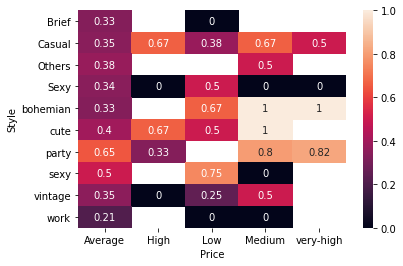

In [53]:
# plot the heat map of Style, price and Recommendation.

var = pd.pivot_table(data = att, index = 'Style',columns = "Price",values = 'Recommendation' )
sns.heatmap(var, annot = True)

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


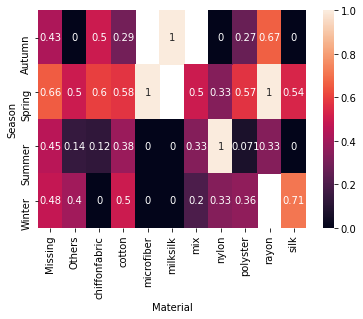

In [54]:
# plot the heat map of Season, material and Recommendation.

rec = pd.pivot_table(data = att, index = 'Season', columns = 'Material', values = 'Recommendation')
sns.heatmap(rec, annot = True)